# Loan Data from Prosper
## by Adolf Nefischer

## Preliminary Wrangling

> This project investigates the Loan Data from Prosper and shows the relationship within the data. According to the provided documents this data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

> The main question in this investigation is: What factors affect a loan’s outcome status?


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv('prosperLoanData.csv')

In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of your dataset?

> As stated in the project describtion this data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

### What is/are the main feature(s) of interest in your dataset?

> Regarding the question "What factors affect a loan’s outcome status?" the main feature of interest is the _LoanStatus_.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I guess the loan status depends on the income and expenses of a person or company. Therefor _EmploymentStatus_, _IncomeRange_, _EmploymentStatusDuration_, _DebtToIncomeRatio_ sound like good first indecators.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [6]:
# At first we look at the actual loan status itself
df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [7]:
# Most loans look fine, but some seem to be past due or even Chargedoff. 
# To make things easier we remove FinalPaymentInProgress and cancled ones.

dfn =df.copy()

dfn.loc[dfn['LoanStatus'].str.contains('Past Due'),'LoanStatus'] = 'PastDueOrDefaulted'
dfn.loc[dfn['LoanStatus'].str.contains('Defaulted'),'LoanStatus'] = 'PastDueOrDefaulted'
dfn.loc[dfn['LoanStatus'].str.contains('FinalPaymentInProgress'),'LoanStatus'] = 'Completed'
dfn = dfn.drop(dfn[dfn['LoanStatus'].str.contains('Cancelled')].index)
loanstatus = dfn['LoanStatus'].value_counts()
print(loanstatus)

Current               56576
Completed             38279
Chargedoff            11992
PastDueOrDefaulted     7085
Name: LoanStatus, dtype: int64


Current: 49.66%
Completed: 33.60%
Charged off: 10.53%
Past Due or Defaulted: 6.22%


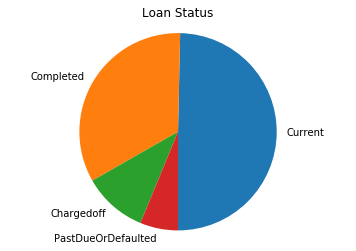

In [8]:
label = 'Current', 'Completed', 'Chargedoff', 'PastDueOrDefaulted'
plt.pie(loanstatus, labels=label, startangle=-90)
plt.axis('equal')
plt.title('Loan Status');

print('Current:',"{:.2%}".format(loanstatus[0]/sum(loanstatus)))
print('Completed:',"{:.2%}".format(loanstatus[1]/sum(loanstatus)))
print('Charged off:',"{:.2%}".format(loanstatus[2]/sum(loanstatus)))
print('Past Due or Defaulted:',"{:.2%}".format(loanstatus[3]/sum(loanstatus)))

> Most loans actuall look fine. However about 16% are problematic.
They are either already charged off (11%) or are Past Due/Dfaulted (6%).
To make the evaluation easier cancled loans are removed. Past Due or Defaulted loans are grouped and Loans with FinalPaymentInProgress are added to the completed loans.

> As our question actually loan outcome we simplify things even further and only look at Completed and failed loans.

Completed    38279
Failed       19077
Name: LoanStatus, dtype: int64
Total: 57356
Completed: 66.74%
Failed: 33.26%


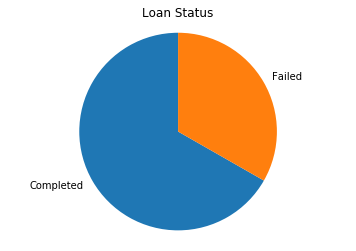

In [9]:
dfs =dfn.copy()
dfs.loc[dfs['LoanStatus'].str.contains('PastDueOrDefaulted'),'LoanStatus'] = 'Failed'
dfs.loc[dfs['LoanStatus'].str.contains('Chargedoff'),'LoanStatus'] = 'Failed'
dfs = dfs.drop(dfs[dfs['LoanStatus'].str.contains('Current')].index)
loanstatus = dfs['LoanStatus'].value_counts()
print(loanstatus)
print("Total:",sum(loanstatus))
label = 'Completed', 'Failed'
plt.pie(loanstatus, labels=label, startangle=90)
plt.axis('equal')
plt.title('Loan Status');

print('Completed:',"{:.2%}".format(loanstatus[0]/sum(loanstatus)))
print('Failed:',"{:.2%}".format(loanstatus[1]/sum(loanstatus)))

> With this simplification we only look at 57,356 loans from initially 113,937 (so about 50%) of which we consider 33% a failure and 66% a success.

> We now look at the interesting datasets.

Employed         67322
Full-time        26354
Self-employed     6134
Not available     5346
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64


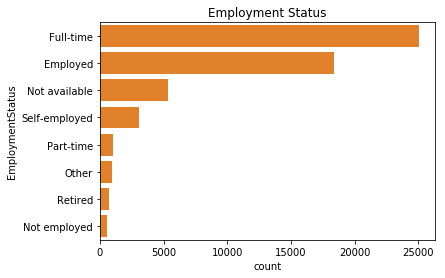

In [10]:
plt.title("Employment Status")
sb.countplot(data = dfs, y = 'EmploymentStatus', order = dfs['EmploymentStatus'].value_counts().index,
             color = sb.color_palette()[1]);
print(dfn['EmploymentStatus'].value_counts())

> Most loan takers are employed or even work specifically full-time. The number of self-employed people is significatly lower. But there are also entrys without any data or just "other" and even unemployed ones.

Employed         44495
Not employed      6857
Self-employed     3049
Name: EmploymentStatus, dtype: int64


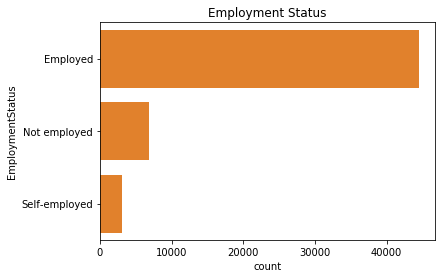

In [11]:
dfs = dfs[dfs['EmploymentStatus'].notna()]
dfs.loc[dfs['EmploymentStatus'].str.contains('Full'),'EmploymentStatus'] = 'Employed'#
dfs.loc[dfs['EmploymentStatus'].str.contains('Part'),'EmploymentStatus'] = 'Employed'
dfs.loc[dfs['EmploymentStatus'].str.contains('Not available'),'EmploymentStatus'] = 'Not employed'
dfs.loc[dfs['EmploymentStatus'].str.contains('Other'),'EmploymentStatus'] = 'Not employed'
dfs = dfs.drop(dfs[dfs['EmploymentStatus'].str.contains('Retired')].index)

plt.title("Employment Status")
sb.countplot(data = dfs, y = 'EmploymentStatus', order = dfs['EmploymentStatus'].value_counts().index,
             color = sb.color_palette()[1]);
print(dfs['EmploymentStatus'].value_counts())

> Most of the observed loans are taken by people who are employed.

count    49042.000000
mean        81.399046
std         85.187965
min          0.000000
25%         21.000000
50%         53.000000
75%        113.000000
max        755.000000
Name: EmploymentStatusDuration, dtype: float64

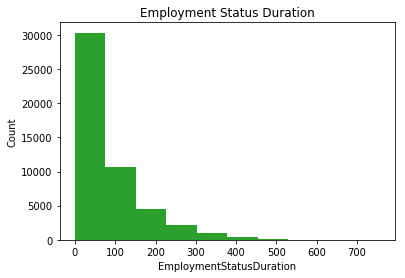

In [12]:
dfs = dfs[dfs['EmploymentStatusDuration'].notna()]
plt.hist(data = dfs, x = 'EmploymentStatusDuration', color = sb.color_palette()[2]);
plt.xlabel('EmploymentStatusDuration');
plt.ylabel('Count');
plt.title("Employment Status Duration");
dfs['EmploymentStatusDuration'].describe()

> The average Employment Status Duration is 83.

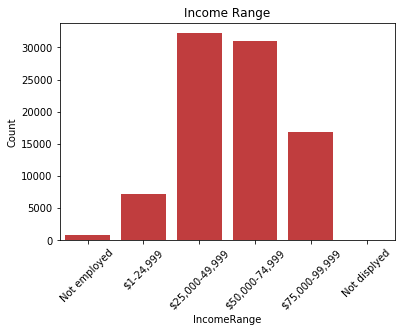

In [13]:
dfs = dfs[dfs['IncomeRange'].notna()]
income_order = ["Not employed", "$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "Not displyed"]
sb.countplot(x = "IncomeRange", data = df, order = income_order, color = sb.color_palette()[3])
plt.xlabel('IncomeRange');
plt.ylabel('Count');
plt.title("Income Range");
plt.xticks(rotation = 45);

> Most loans in the selected dataset are given to people with a middle income, below 25K there is oly a low percentage. Most incomes are between 25K-75K.

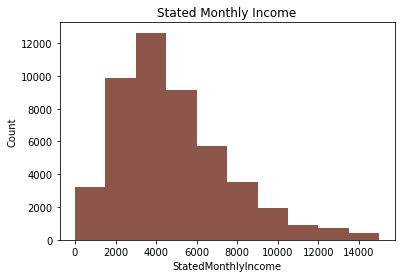

In [14]:
plt.hist(data =dfs, x = 'StatedMonthlyIncome',range=(0, 15000), color = sb.color_palette()[5])
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('Count');
plt.title("Stated Monthly Income");

> Most people have a stated monthly income of about 4000. This looks fine with the given Income Range.

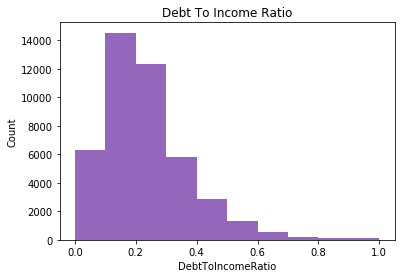

In [15]:
dfs = dfs[dfs['DebtToIncomeRatio'].notna()]
plt.hist(data = dfs, x = 'DebtToIncomeRatio',range=(0, 1), color = sb.color_palette()[4]);
plt.xlabel('DebtToIncomeRatio');
plt.ylabel('Count');
plt.title("Debt To Income Ratio");

> The average Dept to Income Ratio is at about 0.2.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

* Most of the observed loans are taken by people who are employed.
* The average Dept to Income Ratio is at about 0.2.
* The average Employment Status Duration is 83.
* Most loans in the selected dataset are given to people with a middle income, below 25K there is oly a low percentage. Most incomes are between 25K-75K.
* Most people have a stated monthly income of about 4000. This looks fine with the given Income Range.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

* As we are interessted in the outcome of the loan status it was reduced and grouped to completed and failed loan.
* Some values i.e. Employed, Full-time, Part-time, ... where grouped to make observations easier.
* NaN values where removed on the observed values.



## Bivariate Exploration

> In a first step we lock at the loan status itself. Is there a correlation to Employment Status or Income Range?

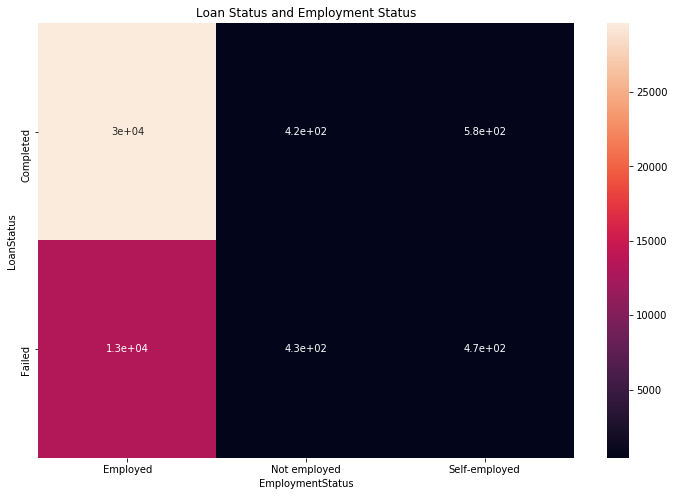

In [16]:
plt.figure(figsize = [12, 8])
temp = dfs.groupby(['EmploymentStatus', 'LoanStatus']).size()
temp = temp.reset_index(name = 'count')
temp = temp.pivot(index = 'LoanStatus', columns = 'EmploymentStatus', values = 'count')
sb.heatmap(temp, annot = True);
plt.title('Loan Status and Employment Status');

> People who are Employed are more likely to complete a loan.

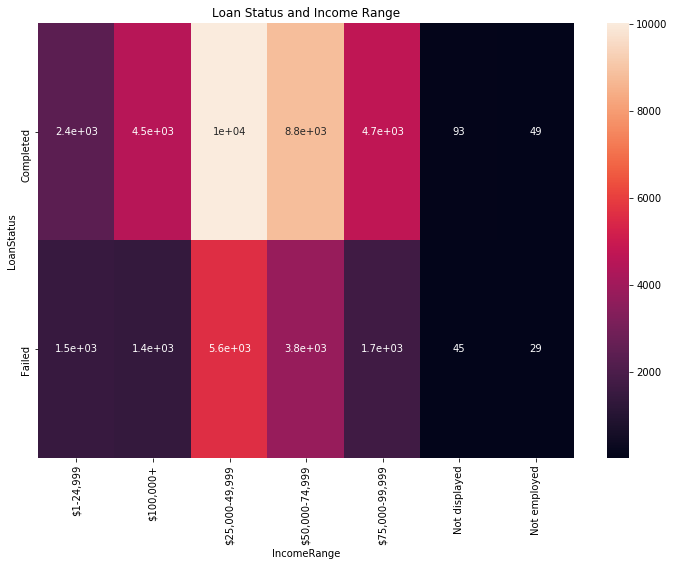

In [17]:
plt.figure(figsize = [12, 8])
temp = dfs.groupby(['IncomeRange', 'LoanStatus']).size()
temp = temp.reset_index(name = 'count')
temp = temp.pivot(index = 'LoanStatus', columns = 'IncomeRange', values = 'count')
sb.heatmap(temp, annot = True);
plt.title('Loan Status and Income Range');

> It does not seem like one Income Range has a higher failed loan status.

> Is there a correlation between loan status and Dept to Income Ratio?

Text(0.5,1,'Loan Status and Debt To Income Ratio')

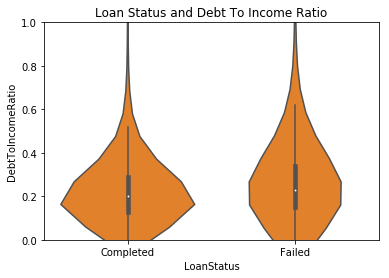

In [18]:
ax = sb.violinplot(data = dfs, x = 'LoanStatus', y = 'DebtToIncomeRatio', 
                    color = sb.color_palette()[1])
ax.set_ylim(0, 1)
plt.title('Loan Status and Debt To Income Ratio')

> We can observe that failed loans have a higher Dept to Income tatio.

> How long do people have their Employment status?

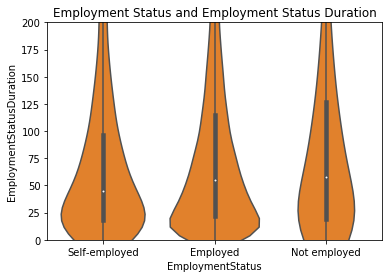

In [19]:
ax = sb.violinplot(data = dfs, x = 'EmploymentStatus', y = 'EmploymentStatusDuration', 
                    color = sb.color_palette()[1]);
ax.set_ylim(0, 200);
plt.title('Employment Status and Employment Status Duration');

> It seems like most employed people with a loan just started to work.

> It seems like people with a middle income (25K-75K) have a higher Debt To Income Ratio.

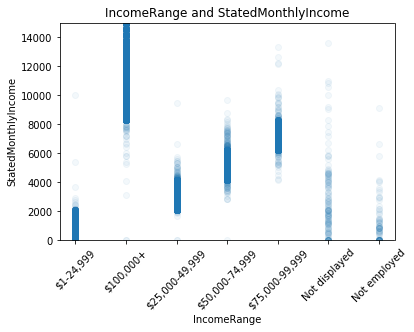

In [20]:
plt.scatter(data = dfs, x = 'IncomeRange',  y = 'StatedMonthlyIncome',  alpha =  0.05)
plt.title('IncomeRange and StatedMonthlyIncome')
plt.xlabel('IncomeRange')
plt.ylabel('StatedMonthlyIncome')
plt.ylim(0,15000)
plt.xticks(rotation = 45);

> The stated monthly income seems to correlate well to the Income Range. Althogh some people earn more or less, maybe due to some special bonus payment system. 

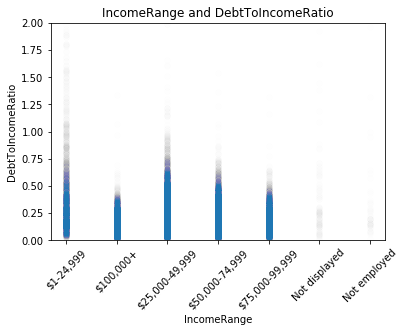

In [21]:
plt.scatter(data = dfs, x = 'IncomeRange', y = 'DebtToIncomeRatio',  alpha =  0.005)
plt.title('IncomeRange and DebtToIncomeRatio')
plt.xlabel('IncomeRange')
plt.ylabel('DebtToIncomeRatio')
plt.ylim(0,2)
plt.xticks(rotation = 45);


> It seems like people with a middle income (25K-75K) have a higher average Debt To Income Ratio. However, people with lower income have the overall highest Dept to Income Ratio.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* People who are Employed are more likely to complete a loan.
* It does not seem like one Income Range has a higher failed loan status.
* We can observe that failed loans have a higher Dept to Income tatio.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* It seems like most employed people with a loan just started to work.
* It seems like people with a middle income (25K-75K) have a higher average Debt To Income Ratio. However, people with lower income have the overall highest Dept to Income Ratio.
* The stated monthly income seems to correlate well to the Income Range. Althogh some people earn more or less, maybe due to some special bonus payment system.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

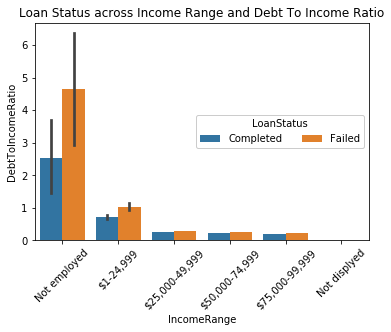

In [22]:
ax = sb.barplot(data = dfs, x = 'IncomeRange', y = 'DebtToIncomeRatio', hue = 'LoanStatus', order = income_order)
ax.legend(loc = 7, ncol = 3, framealpha = 1, title = 'LoanStatus')
plt.title('Loan Status across Income Range and Debt To Income Ratio');
plt.xticks(rotation = 45);

> After combining the plots from the previous investigations we can clearly see what we already expected: People with high Dep To Income Ratio and low or no income have a high risk to fail their loan.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> People with high Dep To Income Ratio and low or no income have a high risk to fail their loan.

### Were there any interesting or surprising interactions between features?

> No, everything turned out as expected.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'exploration_template.ipynb'])

0